In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [4]:
customer =pd.read_csv('E:\Customer.csv')
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [5]:
prod_cat_info=pd.read_csv('E:\prod_cat_info.csv')
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [6]:
transactions=pd.read_csv('E:\Transactions.csv')
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


## Question 1 : Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [7]:
customer_initial = pd.merge(left = customer, right = transactions, how="inner", left_on = "customer_Id", right_on = "cust_id")
customer_initial.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store


In [9]:
Customer_Final = pd.merge(left=customer_initial, right = prod_cat_info, how = "inner", left_on = "prod_subcat_code", right_on = "prod_sub_cat_code")
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,5,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,5,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,5,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,5,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,5,Books,7,Fiction


## Question 2(a) : Prepare a summary report for the merged data set -- Get the column names and their corresponding data types

In [10]:
Customer_Final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code_x', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat_code_y', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [12]:
Customer_Final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code_x        int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat_code_y        int64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

## Question 2(b) : Top/Bottom 10 observations

In [13]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,5,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,5,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,5,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,5,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,5,Books,7,Fiction
5,274630,01-02-1970,M,4.0,78357345891,274630,11/4/2012,7,5,1,646,67.830,713.830,TeleShop,5,Books,7,Fiction
6,273541,01-02-1970,M,4.0,23916816961,273541,9/2/2013,7,5,4,410,172.200,1812.200,e-Shop,5,Books,7,Fiction
7,269008,13-02-1970,F,6.0,35560569829,269008,9/3/2013,7,5,1,1441,151.305,1592.305,e-Shop,5,Books,7,Fiction
8,269008,13-02-1970,F,6.0,94033312891,269008,26-04-2012,7,5,5,746,391.650,4121.650,MBR,5,Books,7,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,267199,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,5,Books,7,Fiction


In [14]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
57156,273899,07-10-1992,F,5.0,28966519600,273899,31-12-2011,5,3,1,308,32.340,340.340,e-Shop,3,Electronics,5,Computers
57157,269241,09-10-1992,F,4.0,99372261440,269241,6/10/2013,5,3,3,511,160.965,1693.965,e-Shop,3,Electronics,5,Computers
57158,270484,14-10-1992,F,1.0,49410470654,270484,13-11-2013,5,3,2,825,173.250,1823.250,e-Shop,3,Electronics,5,Computers
57159,266825,21-11-1992,F,8.0,8969181661,266825,27-12-2013,5,3,4,109,45.780,481.780,MBR,3,Electronics,5,Computers
57160,267094,24-11-1992,M,9.0,12905992307,267094,26-01-2014,5,3,1,1449,152.145,1601.145,e-Shop,3,Electronics,5,Computers
57161,272141,02-12-1992,F,10.0,79059585885,272141,25-10-2012,5,3,2,1354,284.340,2992.340,e-Shop,3,Electronics,5,Computers
57162,269719,04-12-1992,F,8.0,70553332101,269719,23-11-2013,5,3,2,623,130.830,1376.830,Flagship store,3,Electronics,5,Computers
57163,275051,04-12-1992,M,5.0,77933614379,275051,18-05-2013,5,3,5,1095,574.875,6049.875,e-Shop,3,Electronics,5,Computers
57164,270695,05-12-1992,F,6.0,2300510157,270695,20-11-2012,5,3,3,906,285.390,3003.390,TeleShop,3,Electronics,5,Computers
57165,270476,25-12-1992,F,3.0,85475160771,270476,9/8/2011,5,3,5,1354,710.850,7480.850,Flagship store,3,Electronics,5,Computers


## Question 2(c) : “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [15]:
df = Customer_Final.select_dtypes(["float64", "int64"])

df[['Qty', 'Rate', 'Tax','total_amt']].describe()

,Qty,Rate,Tax,total_amt
count,57166.000000,57166.000000,57166.000000,57166.000000
mean,2.429766,635.022653,248.967409,2102.084532
std,2.273219,623.390431,187.344788,2516.597510
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.490000,764.660000
50%,3.000000,709.000000,199.342500,1759.160000
75%,4.000000,1109.000000,364.980000,3553.680000
max,5.000000,1500.000000,787.500000,8287.500000


## Question 2(d) : Frequency tables for all the categorical variables

In [17]:
pd.DataFrame(pd.value_counts(Customer_Final.Gender))

,Gender
M,29191
F,27953


In [18]:
pd.DataFrame(pd.value_counts(Customer_Final.city_code))

,city_code
4.0,5961
5.0,5941
3.0,5886
10.0,5800
8.0,5771
7.0,5761
2.0,5616
1.0,5582
9.0,5538
6.0,5295


In [19]:
pd.DataFrame(pd.value_counts(Customer_Final.prod_sub_cat_code))

,prod_sub_cat_code
4,16008
3,9201
10,8979
1,8850
11,4116
12,4058
7,1043
2,1007
6,989
9,985


In [20]:
pd.DataFrame(pd.value_counts(Customer_Final.prod_cat_code_x))

,prod_cat_code_x
5,12141
2,10006
3,9895
1,9847
6,8288
4,6989


In [21]:
pd.DataFrame(pd.value_counts(Customer_Final.Store_type))

,Store_type
e-Shop,23087
MBR,11644
Flagship store,11324
TeleShop,11111


In [22]:
pd.DataFrame(pd.value_counts(Customer_Final.prod_cat_code_y))

,prod_cat_code_y
5,12179
1,10019
2,10019
3,9910
6,8087
4,6952


In [23]:
pd.DataFrame(pd.value_counts(Customer_Final.prod_subcat))

,prod_subcat
Women,10019
Mens,9902
Kids,7069
Mobiles,4002
Comics,3067
Audio and video,2993
Non-Fiction,2993
Kitchen,2993
Children,2058
Bath,2058


In [24]:
pd.DataFrame(pd.value_counts(Customer_Final.prod_subcat_code))

,prod_subcat_code
4,16008
3,9201
10,8979
1,8850
11,4116
12,4058
7,1043
2,1007
6,989
9,985


## Question 3: Generate histograms for all continuous variables and frequency bars for categorical variables.


#### Histogram for all the continuous variables

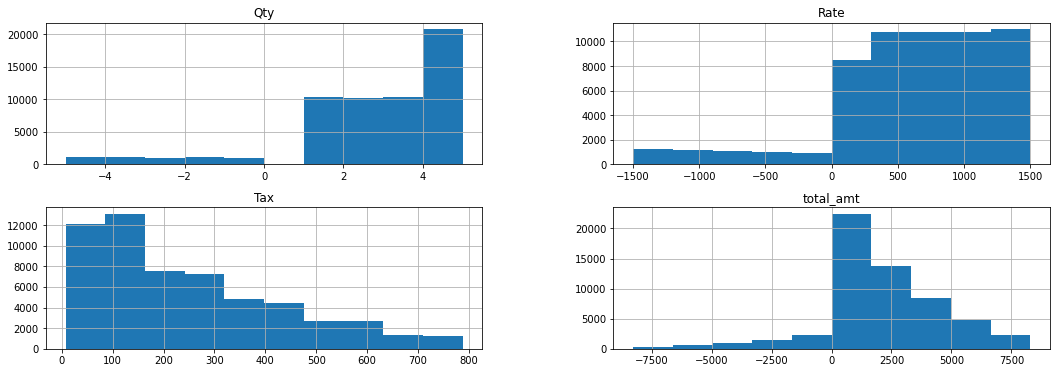

In [26]:
Customer_Final[['Qty', 'Rate', 'Tax','total_amt']].hist(figsize = (18,6))
plt.show()

#### Bar Plot for all the categorical variables

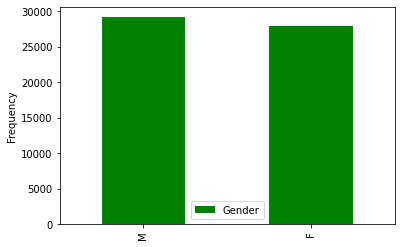

In [28]:
pd.DataFrame(pd.value_counts(Customer_Final.Gender)).plot.bar(color="green", ylabel = "Frequency")
plt.show()

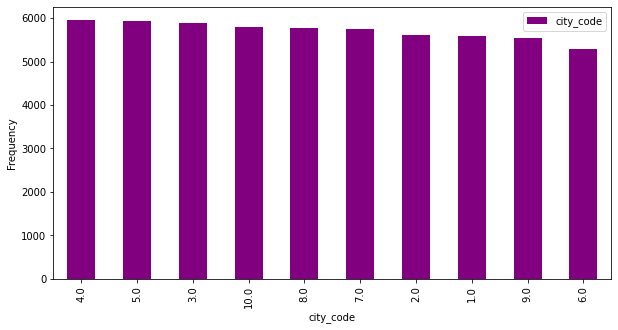

In [32]:
pd.DataFrame(pd.value_counts(Customer_Final.city_code)).plot.bar(color="purple", xlabel = "city_code", ylabel = "Frequency",figsize = (10,5))
plt.show()

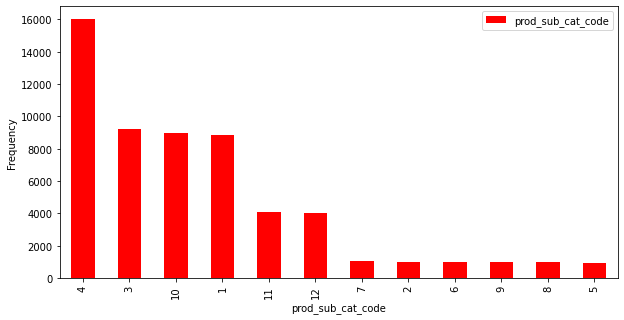

In [34]:
pd.DataFrame(pd.value_counts(Customer_Final.prod_sub_cat_code)).plot.bar(color="red", xlabel = "prod_sub_cat_code",ylabel = "Frequency", figsize = (10,5))
plt.show()

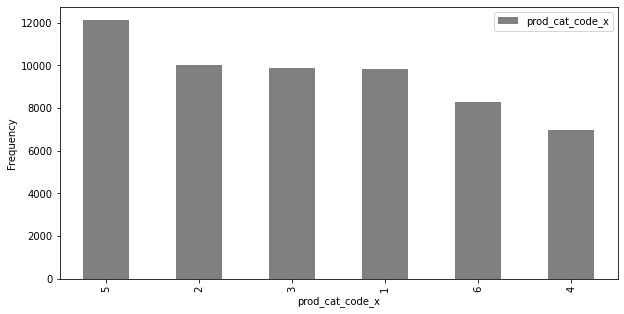

In [36]:
pd.DataFrame(pd.value_counts(Customer_Final.prod_cat_code_x)).plot.bar(color="gray", xlabel = "prod_cat_code_x",ylabel = "Frequency", figsize = (10,5))
plt.show()

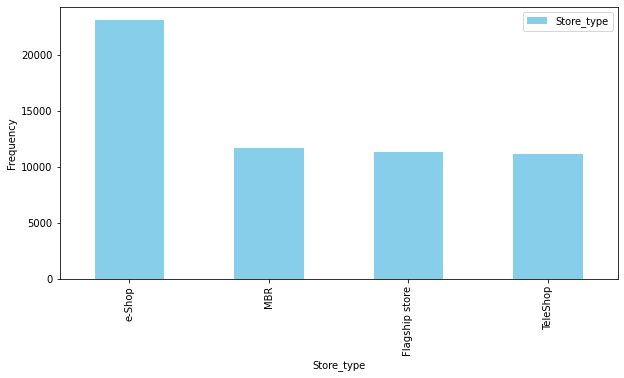

In [38]:
pd.DataFrame(pd.value_counts(Customer_Final.Store_type)).plot.bar(color="skyblue", xlabel = "Store_type",ylabel = "Frequency", figsize = (10,5))
plt.show()

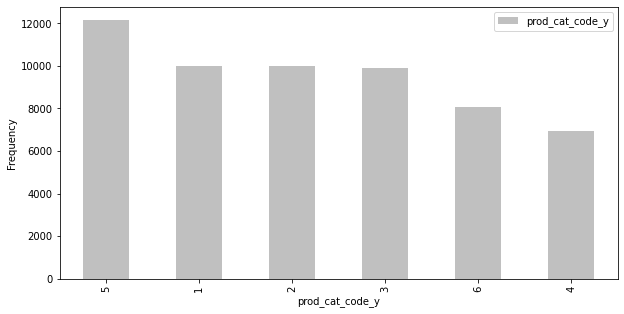

In [40]:
pd.DataFrame(pd.value_counts(Customer_Final.prod_cat_code_y)).plot.bar(color="silver", xlabel = "prod_cat_code_y",ylabel = "Frequency", figsize = (10,5))
plt.show()

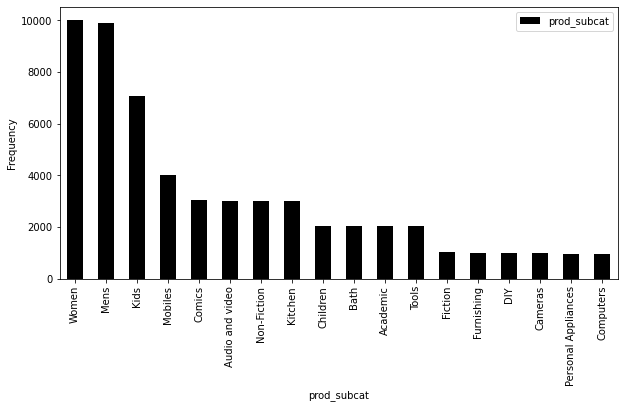

In [43]:
pd.DataFrame(pd.value_counts(Customer_Final.prod_subcat)).plot.bar(color="black", xlabel = "prod_subcat",ylabel = "Frequency", figsize = (10,5))
plt.show()

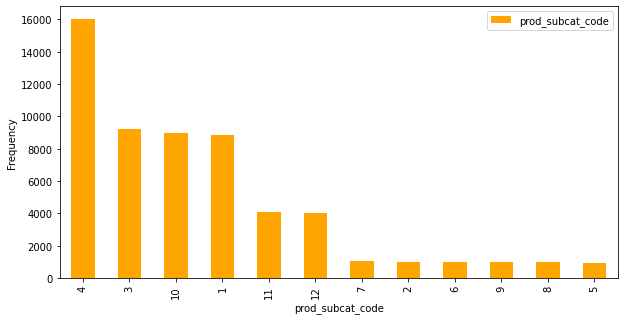

In [46]:
pd.DataFrame(pd.value_counts(Customer_Final.prod_subcat_code)).plot.bar(color="orange", xlabel = "prod_subcat_code",ylabel = "Frequency", figsize = (10,5))
plt.show()

## Question 4(a) : Calculate the following information using the merged dataset ----- Time period of the available transaction data

In [48]:
Customer_Final["tran_date"] = pd.to_datetime(Customer_Final.tran_date)

In [49]:
tran_period_in_years = Customer_Final["tran_date"].max().year-Customer_Final["tran_date"].min().year
tran_period_in_years

3

## Question 4(b) : Count of transactions where the total amount of transaction was negative

In [50]:
Customer_Final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code_x', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat_code_y', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [51]:
Customer_Final.loc[Customer_Final.total_amt <0 , ['transaction_id','total_amt']].transaction_id.nunique()

2059

## Question 5: Analyze which product categories are more popular among females vs male customers.

In [52]:
Customer_Final[["prod_cat", "Gender"]].groupby(["prod_cat", "Gender"]).count()

Empty DataFrame
Columns: []
Index: [(Bags, F), (Bags, M), (Books, F), (Books, M), (Clothing, F), (Clothing, M), (Electronics, F), (Electronics, M), (Footwear, F), (Footwear, M), (Home and kitchen, F), (Home and kitchen, M)]

In [53]:
pd.crosstab(index = Customer_Final.prod_cat, columns = Customer_Final.Gender).sort_values(by = ["F", "M"], ascending = False)

Gender,F,M
prod_cat,,
Books,6004,6169
Clothing,4916,5099
Footwear,4916,5099
Electronics,4795,5113
Home and kitchen,3959,4125
Bags,3363,3586


## Question 6 : Which City code has the maximum customers and what was the percentage of customers from that city?

In [55]:
Customer = Customer_Final[["city_code", "customer_Id"]].drop_duplicates().groupby("city_code").customer_Id.count().reset_index().sort_values(by = "customer_Id", ascending = False)
Customer

,city_code,customer_Id
2,3.0,576
4,5.0,570
3,4.0,569
6,7.0,563
7,8.0,551
1,2.0,546
9,10.0,546
0,1.0,535
8,9.0,532
5,6.0,516


In [56]:
#Percentage of customers in city code 3.
round(dataset.customer_Id*100/sum(dataset.customer_Id),1).head()

2    10.5
4    10.4
3    10.3
6    10.2
7    10.0
Name: customer_Id, dtype: float64

## QUESTION 7

In [57]:
Customer_Final[["Store_type", "total_amt", "Qty"]].groupby("Store_type").sum()

,total_amt,Qty
Store_type,,
Flagship store,24072659.26,27600
MBR,24018167.29,27869
TeleShop,22980349.08,27059
e-Shop,49096588.71,56372


## Question 8: What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [58]:
data_set = Customer_Final.loc[Customer_Final.Store_type=="Flagship store", ["Store_type","prod_cat", "total_amt"]]

data_set.loc[data_set.prod_cat.isin(["Electronics", "Clothing"]), :].groupby("prod_cat").sum()

,total_amt
prod_cat,
Clothing,4177586.205
Electronics,4349256.795


 ## Question 9: What was the total amount earned from "Male" customers under the "Electronics" category? 

In [59]:
dataset = Customer_Final.loc[Customer_Final.prod_cat=="Electronics", ["Gender","prod_cat", "total_amt"]]

dataset.loc[dataset.Gender == "M", :].total_amt.sum()

10947130.025

## Question 10: How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [60]:
data1 = Customer_Final.loc[Customer_Final.total_amt > 0, ["transaction_id","customer_Id","total_amt"]].drop_duplicates()
data2 = data1.groupby("customer_Id").transaction_id.count().reset_index()
data2[data2["transaction_id"]>10]

,customer_Id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


## Question 11(a) : For all customers aged between 25 - 35, find out: What was the total amount spent for “Electronics” and “Books” product categories?

In [61]:
Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)
Customer_Final.DOB.head(3)

0   1970-02-01
1   1970-01-16
2   1970-01-18
Name: DOB, dtype: datetime64[ns]

In [62]:
Customer_Final["Age"] = datetime.datetime.now().year-Customer_Final["DOB"].dt.year
Customer_Final.head(3)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,Age
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,5,Books,7,Fiction,51
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,5,Books,7,Fiction,51
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,5,Books,7,Fiction,51


In [63]:
data_set = Customer_Final.loc[Customer_Final.prod_cat.isin(["Electronics", "Books"]), ["prod_cat", "total_amt", "Age"]]

data_set.loc[data_set.Age.isin(np.arange(25,36,1)), :].groupby("prod_cat").total_amt.sum().reset_index()

,prod_cat,total_amt
0,Books,7617289.875
1,Electronics,6470168.380


In [64]:
np.arange(25,36,1)

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])

## Question 11(b): What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [65]:
start = pd.to_datetime("1-1-2014", format = "%d-%m-%Y")
end = pd.to_datetime("1-03-2014", format = "%d-%m-%Y")

data = Customer_Final.loc[(Customer_Final.tran_date > start) & (Customer_Final.tran_date < end), ["Age", "tran_date", "total_amt"]]
round(data.loc[data.Age.isin(np.arange(25,36,1)), "total_amt"].sum(),2)

1214430.36